# yFinance
Links for References used for this excercise: 
1. https://github.com/ranaroussi/yfinance
2. https://www.geeksforgeeks.org/python/multithreaded-download-of-yahoo-stock-history-with-python-yfinance/
3. For handling dates and time: 
    *  https://docs.python.org/3/library/datetime.html for calling date and time info
    *  https://stackoverflow.com/questions/32490629/getting-todays-date-in-yyyy-mm-dd-in-python for formatting the date info 
    *  https://www.geeksforgeeks.org/python/python-datetime-strptime-function/ for strptime changing Date and time into a string to be used in the filename
4. Saving dataframe to csv files https://www.datacamp.com/tutorial/save-as-csv-pandas-dataframe
5. Info about saving files into different directories in codespaces https://docs.github.com/en/codespaces/about-codespaces/deep-dive
6. Translate function for stripping out multiple characters from string filename https://www.geeksforgeeks.org/python/python-replace-multiple-characters-at-once/

In [97]:
# Problem 1: Data from yfinance

# import required modules 
import yfinance as yf
import time
import datetime
import pandas as pd
from pathlib import Path
import os

# define program start time and dates for use in calculations 
start= time.time()
today = datetime.date.today()
yesterday = today - datetime.timedelta(days=1)
fivedaysago = today - datetime.timedelta(days=5)

# Convert dates to string type data as is required by the yf.download function
strtoday = str(today)
strfivedaysago =str(fivedaysago)

#Checking the formats of the dates are correct
    #print (type(strtoday))
    #print (type(strfivedaysago))
print (f"Today's date is ",today)
print (f"Five days ago was ",fivedaysago)

# define a list of stocks to track
ticker_list =['META','AAPL','AMZN','NFLX','GOOG']

# Define path to root file
datadir = "./data/"

# Define get_data() function to execute this section of code on call
def get_data():

    # Define the functon for collecting the data we want.
        # Start date will be 5 days ago as per instructions. 
        # End date will be the date the script is ran on. 
        # Tickers list is the list of stocks to watch. 
        # Threads allows for the multithread download of stock data - this reduces the time taken to run the script.  
        # group_by allows for the data to be organised by different columns. 

    # Execute the yf.download operation and populating the data into a dataframe.  
    data =yf.download( 
        start= strfivedaysago,
        end= strtoday,
        tickers = ticker_list,
        threads=True,
        group_by='ticker',
        auto_adjust = True,
    )

    # Transpose the data to allow data to be read from dataframe. 
    data = data.T 

    # Read out each line into the dataframe one line at a time
    for t in ticker_list: 
        print(t)   
        print(data.loc[t])
        print("\n")

    # Get date and time information for file name into the correct format
    time_data = str(datetime.datetime.now())
    format_data = "%Y-%m-%d %H:%M:%S.%f"
    filename = datetime.datetime.strptime(time_data, format_data)

    # Convert the filename into a string format
    strfilename = str(filename)

    # remove the : and - characters from the time segment
    # First we define out list of charachters to replace in a matched set called replacements. 
    replacements = str.maketrans({":": "", "-":""})

    # Then we execute the translate function
    strfilename = strfilename.translate(replacements)

    # Remove the microseconds from the end of the string
    strfilename = strfilename[:-7]
    print (strfilename)


    print (f"path is ", datadir)
    # comment

    # Write data to csv file. 
    data.to_csv(datadir+strfilename+".csv", sep=',')

# run the get_data function
get_data()

# This segment allows for monitoring the time taken to complete the execution of the program. 
print ('The program takes ', time.time()-start,'seconds.')

[                       0%                       ]

[*********************100%***********************]  5 of 5 completed

Today's date is  2025-10-10
Five days ago was  2025-10-05
META
Date      2025-10-06    2025-10-07    2025-10-08    2025-10-09
Price                                                         
Open    7.051900e+02  7.177200e+02  7.134500e+02  7.182800e+02
High    7.168800e+02  7.185000e+02  7.196500e+02  7.335100e+02
Low     6.905100e+02  7.057500e+02  7.078100e+02  7.124400e+02
Close   7.156600e+02  7.130800e+02  7.178400e+02  7.335100e+02
Volume  2.165470e+07  1.206290e+07  1.079060e+07  1.271720e+07


AAPL
Date      2025-10-06    2025-10-07    2025-10-08    2025-10-09
Price                                                         
Open    2.579900e+02  2.568100e+02  2.565200e+02  2.578100e+02
High    2.590700e+02  2.574000e+02  2.585200e+02  2.580000e+02
Low     2.550500e+02  2.554300e+02  2.561100e+02  2.531400e+02
Close   2.566900e+02  2.564800e+02  2.580600e+02  2.540400e+02
Volume  4.466410e+07  3.195580e+07  3.649690e+07  3.832200e+07


AMZN
Date      2025-10-06    2025-10-07    202

20251010 221236.csv
   Ticker   Price    2025-10-06    2025-10-07    2025-10-08    2025-10-09
0    NFLX    Open  1.160370e+03  1.177790e+03  1.197110e+03  1.214250e+03
1    NFLX    High  1.163580e+03  1.201370e+03  1.217390e+03  1.237500e+03
2    NFLX     Low  1.145450e+03  1.177460e+03  1.192000e+03  1.211820e+03
3    NFLX   Close  1.163310e+03  1.191060e+03  1.214250e+03  1.231070e+03
4    NFLX  Volume  2.968600e+06  3.309100e+06  2.851400e+06  2.824100e+06
5    AAPL    Open  2.579900e+02  2.568100e+02  2.565200e+02  2.578100e+02
6    AAPL    High  2.590700e+02  2.574000e+02  2.585200e+02  2.580000e+02
7    AAPL     Low  2.550500e+02  2.554300e+02  2.561100e+02  2.531400e+02
8    AAPL   Close  2.566900e+02  2.564800e+02  2.580600e+02  2.540400e+02
9    AAPL  Volume  4.466410e+07  3.195580e+07  3.649690e+07  3.832200e+07
10   AMZN    Open  2.210000e+02  2.208800e+02  2.229200e+02  2.250000e+02
11   AMZN    High  2.217300e+02  2.228900e+02  2.267300e+02  2.282100e+02
12   AMZN     Low 

<>:15: SyntaxWarning: invalid escape sequence '\d'
<>:15: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_2473/1419175372.py:15: SyntaxWarning: invalid escape sequence '\d'
  s = re.findall("\d+",f)
/tmp/ipykernel_2473/1419175372.py:15: SyntaxWarning: invalid escape sequence '\d'
  s = re.findall("\d+",f)


KeyError: "None of [Index(['NFLX', 'AAPL', 'AMZN', 'META', 'GOOG'], dtype='object')] are in the [columns]"

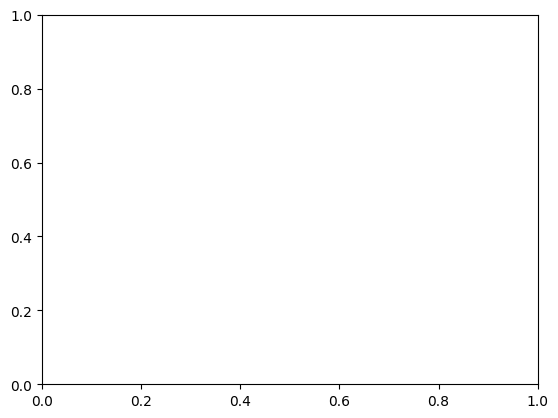

In [ ]:
# Problem 2: Plotting Data
# https://stackoverflow.com/questions/43074685/find-file-in-directory-with-the-highest-number-in-the-filename for filename with highest number, as this will be the latest created file

# Import the Rational Expressions module (re). 
import re
import matplotlib 

# list all files in the directory data 
list_of_files = os.listdir(datadir)
#print (list_of_files)

# Determine which filename has the highest number (N.B. this only works id there are no files with text names in the folder. - 
# See if i can implement a way to only select fro csv files)
def extract_number(f):
    s = re.findall("\d+",f)
    return (int(s[0]) if s else -1,f)

recentfile = (max(list_of_files,key=extract_number))
recentfile = str(recentfile)
print (recentfile)


# create a dataframe from the file selected as most recent
df = pd.read_csv(datadir+recentfile)
print (df)

# Create a dataframe that only contains the closing prices for each stock for each day
closing_prices = (df['Price']== "Close")
close_df = df.loc[closing_prices]
print (new_df)



#Read a unique label for each unique stock label from column labelled 'Ticker'
unique_stock = df['Ticker'].unique()
print(unique_stock)

df1 = df[df['Ticker'] == unique_stock[0]] #Netflix
df2 = df[df['Ticker'] == unique_stock[1]] #Apple
df3 = df[df['Ticker'] == unique_stock[2]] #Amazon
df4 = df[df['Ticker'] == unique_stock[3]] #Meta
df5 = df[df['Ticker'] == unique_stock[4]] #Google

# print each individual stock
print (df1)
print (df2)
print (df3)
print (df4)
print (df5)


#date = yesterday
#print (date)

#plot
ax = matplotlib.pyplot.gca()
close_df.plot( x = '2025-10-09', y=['NFLX', 'AAPL', 'AMZN', 'META', 'GOOG'] , ax = ax )


# define a plot for the closing price over the last 5 days
#ax=close_df.plot(kind = 'line', x = '2025-10-09', y = 'NFLX', marker = '.', c = 'red' , label = 'Netflix')
#pt.show()

# Create the plot_data() function
#def plot_data():
    #function goes here.
    #gibberish

#plot_data()


## End